In [3]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
from sklearn.utils import shuffle as reset
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [4]:
feature = pd.read_csv("Otherfeature.csv")

In [5]:
feature
colnames = list(feature)
for i in colnames:
    feature = feature[~feature[i].isin(['..'])]
feature = feature.drop('Name\n(PHN/LGA)',axis=1)

In [6]:
feature = feature.dropna()
feature = pd.DataFrame(feature, dtype=np.float)
feature.rename(columns={'Adimissions for mental health related conditions, Persons - All hospitals 2016/17 Asr Per 100,000':'%mental'}, inplace = True)
feature['%mental'] = feature['%mental'].apply(lambda x: x / 100)

In [7]:
def train_test_split(data, test_size, shuffle=True, random_state=None):
    if shuffle:
        data = reset(data, random_state=random_state)
	
    train = data[int(len(data)*test_size):].reset_index(drop = True)
    test  = data[:int(len(data)*test_size)].reset_index(drop = True)
    
    return train, test

In [8]:
train_set, test_set = train_test_split(feature,test_size = 0.3,shuffle=True, random_state=42)

In [63]:
Y_train = train_set['%mental']
Y_test = test_set['%mental']
X_train = train_set.iloc[:,2:] 
X_test = test_set.iloc[:,2:] 

,% labour force participation,% private dwellings where Internet accessed,% persons living in crowded dwellings,Total fertility rate,% Permanent migrants under the Family stream visa\n(total),Aboriginal population as proportion of total population (%),% households in dwellings receiving rent assistance,% persons living in social housing,% mortgage stress,% rental stress,% Low income households,% people receiving an unemployment benefit,% disability support pensioners,% unemployed
0,53.8,69.3,3.9,2.00,0.5,4.5,19.6,6.9,9.6,28.4,50.9,14.4,12.5,12.8
1,67.1,86.7,2.6,1.91,1.2,1.3,14.8,2.8,7.9,30.3,33.7,5.9,3.9,6.0
2,68.9,86.0,4.3,2.15,0.8,3.8,13.9,0.9,7.5,29.7,32.1,3.9,3.0,2.5
3,64.7,70.2,5.7,2.06,0.7,14.5,11.2,4.4,7.7,18.4,42.8,9.7,5.7,7.5
4,48.1,72.5,5.8,2.56,0.7,9.2,35.6,5.0,13.0,38.0,58.0,15.6,12.3,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,59.3,58.2,6.4,2.82,1.1,36.8,26.2,20.1,8.8,19.5,50.9,22.9,15.5,5.2
116,59.6,80.2,4.0,1.97,1.0,5.7,28.7,3.2,9.9,33.0,45.0,8.9,7.1,5.5
117,63.7,72.3,4.6,1.82,1.5,3.2,20.3,4.6,10.7,22.2,45.5,10.2,7.5,6.2
118,57.9,74.8,4.0,1.69,0.6,8.2,17.9,4.9,7.3,32.9,44.0,8.3,9.5,5.0


sklearn Lasso intercept : 22.927120909715462

sklearn Lasso coefficients :
 [ 0.02498783 -0.06136941  0.20505071 -0.          0.          0.
  0.05420557  0.         -0.08333391  0.13920738 -0.28772493 -0.
  0.49131412 -0.        ]

sklearn Lasso number of iterations : 32


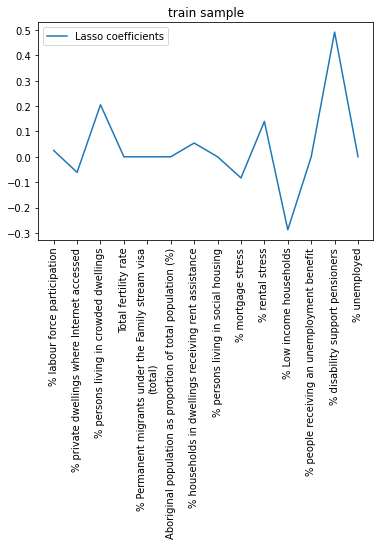

0.1215145621966105

In [51]:
from sklearn import linear_model

sk_lasso = linear_model.LassoCV(eps=0.0001,n_alphas=300,cv=5)
sk_lasso.fit(X_train, Y_train)

print("sklearn Lasso intercept :", sk_lasso.intercept_)
print("\nsklearn Lasso coefficients :\n", sk_lasso.coef_)
print("\nsklearn Lasso number of iterations :", sk_lasso.n_iter_)
y_pred=sk_lasso.predict(X_test)
r2_score(Y_test,y_pred)
#plot
x = range(0,14,1)
plt.figure(figsize=(6,4))
plt.plot(sk_lasso.coef_, label='Lasso coefficients')
plt.legend(loc='best')
plt.title('train sample')
plt.xticks(x,colnames[3:],rotation='vertical')
plt.show()
lasso_coef = pd.DataFrame(sk_lasso.coef_)
lasso_coef['feature'] = colnames[3:]

r55= r2_score(Y_test,y_pred)
r55

In [67]:
#select 4 significant features from previous analysis
Y_new = train_set['%mental']
X_new = train_set[['% disability support pensioners','% Low income households','% rental stress','% persons living in social housing']]
Y_newt = test_set['%mental']
X_newt = test_set[['% disability support pensioners','% Low income households','% rental stress','% persons living in social housing']]

sk_lasso.fit(X_new, Y_new)
print("sklearn Lasso intercept :", sk_lasso.intercept_)
print("\nsklearn Lasso coefficients :\n", sk_lasso.coef_)
print("\nsklearn Lasso number of iterations :", sk_lasso.n_iter_)
y_pred=sk_lasso.predict(X_newt)
r2_score(Y_newt,y_pred)

sklearn Lasso intercept : 22.00512893077554

sklearn Lasso coefficients :
 [ 1.04531652 -0.45571699  0.20561888  0.19213948]

sklearn Lasso number of iterations : 37


0.04895134479503893

array([ 0.02498783, -0.06136941,  0.20505071, -0.        ,  0.        ,
        0.        ,  0.05420557,  0.        , -0.08333391,  0.13920738,
       -0.28772493, -0.        ,  0.49131412, -0.        ])

In [11]:
ls_ = LassoCV(eps=0.0001,n_alphas=300,cv=5).fit(X_train,Y_train)
b_alpha = ls_.alpha_ 
new_alpha = ls_.alphas_
print(ls_.alphas_.shape) 
r2 = ls_.score(X_test,Y_test) 
W = ls_.coef_
print(r2)

(300,)
0.1215145621966105


In [1]:

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
alpha = 0.01

lasso = Lasso(max_iter=10000, alpha=alpha)

y_pred_lasso = lasso.fit(X_train, Y_train).predict(X_test)
r2_score_lasso = r2_score(Y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

lasso.fit(X_train, Y_train)
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.legend(loc='best')
plt.title('train sample')
plt.show()


NameError: name 'X_train' is not defined

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

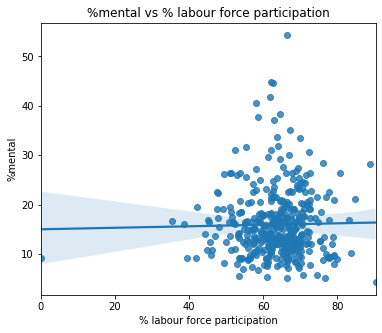

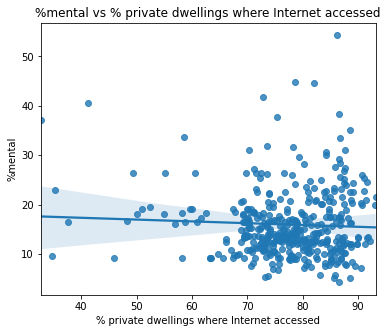

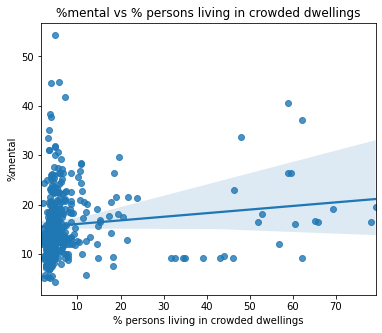

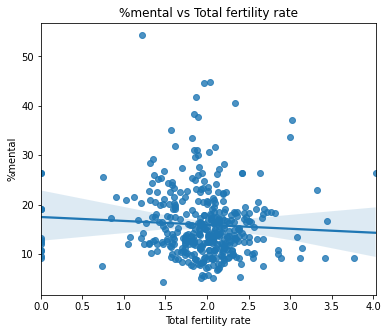

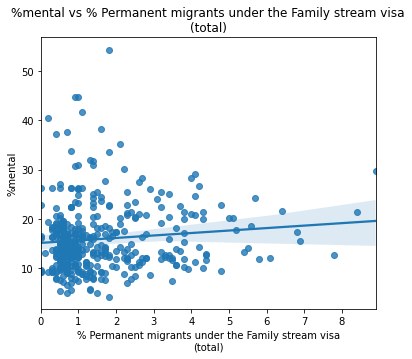

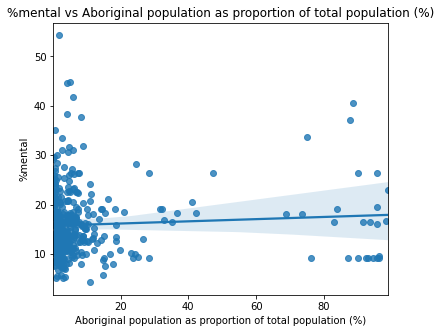

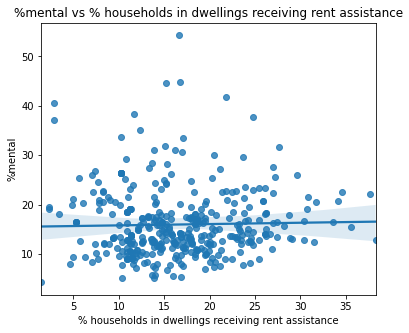

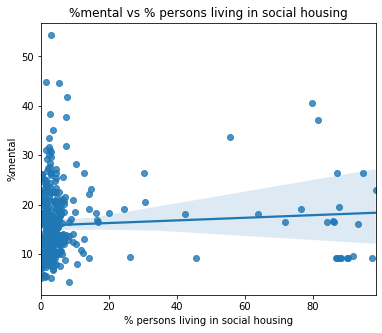

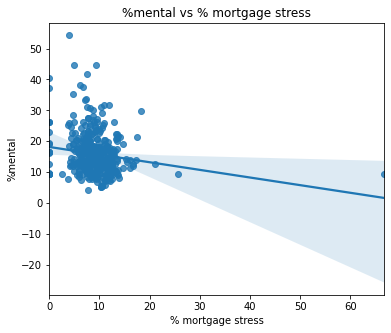

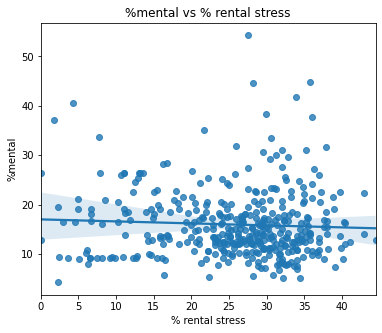

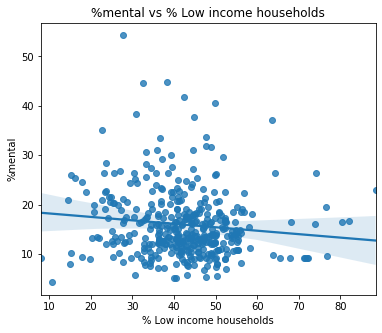

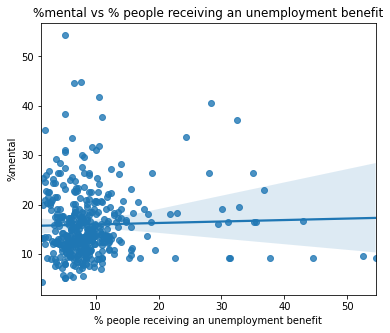

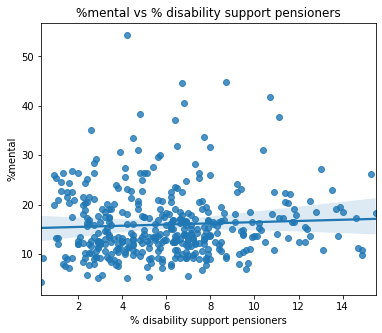

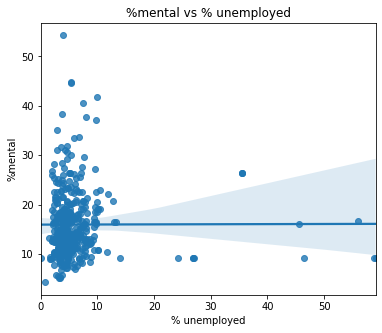

In [52]:
i=1
for f in colnames[3:]:
    plt.figure(i,figsize=(6,5))
    sns.regplot(f,'%mental',data = feature, ci=100)
    plt.title(f'%mental vs {f}')
    i += 1
    plt.savefig(f'%mental vs {f}.png')
    

In [ ]:
sns.regplot( '% labour force participation','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( '% private dwellings where Internet accessed','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( '% persons living in crowded dwellings','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( 'Total fertility rate','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( '% Permanent migrants under the Family stream visa\n(total)','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( 'Aboriginal population as proportion of total population (%)','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( '% households in dwellings receiving rent assistance','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( '% persons living in social housing','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( '% mortgage stress','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( '% rental stress','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( '% Low income households','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( '% people receiving an unemployment benefit','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( '% disability support pensioners','Adimissions for mental health related conditions',data = feature, ci=100)
plt.show()

sns.regplot( '% unemployed','Adimissions for mental health related conditions',data = feature,ci=100)
plt.show()

In [40]:
x = feature[['% labour force participation',
 '% private dwellings where Internet accessed',
 '% persons living in crowded dwellings',
 'Total fertility rate',
 '% Permanent migrants under the Family stream visa\n(total)',
 'Aboriginal population as proportion of total population (%)',
 '% households in dwellings receiving rent assistance',
 '% persons living in social housing',
 '% mortgage stress',
 '% rental stress',
 '% Low income households',
 '% people receiving an unemployment benefit',
 '% disability support pensioners',
 '% unemployed']]
y = feature[['%mental']]
# x=sm.add_constant(x) #添加常数项
# est=sm.OLS(y,x)
# model=est.fit()#建立最小二乘回归模型
# print(model.summary())
# OLS = model.summary()


x = sm.add_constant(x)
result = sm.OLS(y,x).fit(cov_type='HC0',het_scale='HC0')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                %mental   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     5.975
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           1.07e-10
Time:                        09:25:30   Log-Likelihood:                -1297.6
No. Observations:                 401   AIC:                             2625.
Df Residuals:                     386   BIC:                             2685.
Df Model:                          14                                         
Covariance Type:                  HC0                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          24.6255      9.008      2.734      0.006       6.971      42.280
% labour force participation                                    0.0360      0.046      0.787      0.431      -0.054       0.126
% private dwellings where Internet accessed                    -0.0856      0.085     -1.010      0.313      -0.252       0.081
% persons living in crowded dwellings                           0.1472      0.089      1.651      0.099      -0.027       0.322
Total fertility rate                                           -0.4076      0.737     -0.553      0.580      -1.851       1.036
% Permanent migrants under the Family stream visa
(total)       0.8441      0.357      2.365      0.018       0.144       1.544
Aboriginal population as proportion of total population (%)    -0.0290      0.082     -0.352      0.725      -0.191       0.133
% households in dwellings receiving rent assistance             0.0511      0.067      0.759      0.448      -0.081       0.183
% persons living in social housing                              0.1704      0.106      1.614      0.107      -0.037       0.377
% mortgage stress                                              -0.1935      0.105     -1.834      0.067      -0.400       0.013
% rental stress                                                 0.1362      0.078      1.752      0.080      -0.016       0.288
% Low income households                                        -0.3386      0.069     -4.906      0.000      -0.474      -0.203
% people receiving an unemployment benefit                     -0.3388      0.117     -2.895      0.004      -0.568      -0.109
% disability support pensioners                                 1.2226      0.226      5.403      0.000       0.779       1.666
% unemployed                                                    0.0361      0.060      0.598      0.550      -0.082       0.154
==============================================================================
Omnibus:                      117.255   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.395
Skew:                           1.361   Prob(JB):                     2.71e-75
Kurtosis:                       6.625   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#GLM
model = sm.GLM(Y_train, X_train).fit()

y_pred2 = model.predict(X_test)
np.array(y_pred2)
r2_new= r2_score(Y_test,y_pred2)
print(r2_new)

-0.004497437091124157


In [15]:
#Linear
linear = linear_model.LinearRegression()
 
# Train the model using the training sets and check score
linear.fit(X_train, Y_train)
linear.score(X_train, Y_train)
 
#Equation coefficient and Intercept
print('Coefficient: n', linear.coef_)
print('Intercept: n', linear.intercept_)
 
#Predict Output
predicted= linear.predict(X_test)
np.array(predicted)
r2linear = r2_score(Y_test,predicted)
print(r2linear)

Coefficient: n [ 0.10758878 -0.0465013   0.29959916 -0.72059491  0.22964393 -0.02091906
  0.07740138  0.13421873 -0.12809574  0.22899911 -0.40082824 -0.31950467
  1.37011247  0.02769303]
Intercept: n 15.973882859938985
0.05265840289473822


In [16]:
#Logistic
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(X_train,Y_train.astype('int'))
logistic.score(X_train,Y_train.astype('int'))

 

#Equation


print('Coefficient:\n',logistic.coef_)

print('Intercept:\n',logistic.intercept_)

#Predict
predicted2=logistic.predict(X_test)
np.array(predicted2)
r2log = r2_score(Y_test, predicted2)
print(r2log)

Coefficient:
 [[ 2.43023034e-01 -1.00985679e-01 -3.70507486e-02 -1.07524225e-02
  -9.73267623e-03  1.81308860e-02 -2.27371205e-01  7.12581689e-02
   2.51472236e-02 -3.00121054e-01 -3.48548859e-01 -7.82336865e-02
  -5.76765454e-02 -6.76555518e-02]
 [ 8.51442804e-03 -1.08047215e-02  3.14448659e-02  1.82595274e-02
  -7.51076890e-02  1.41045746e-01 -4.11856921e-02 -1.99187550e-01
   2.03704139e-01 -1.84268296e-01  1.90023572e-01 -1.28527437e-01
  -1.37459411e-01 -1.89707656e-01]
 [-5.63808193e-02 -3.96504968e-02 -4.94557125e-02  6.64012152e-03
  -2.32506475e-02 -9.43878078e-02 -6.11750724e-02  1.05668763e-02
   1.77710120e-03  7.96170012e-02  1.42577923e-01 -2.52309686e-02
   3.53911875e-02 -5.45999816e-02]
 [-2.66051636e-02  1.86262063e-03 -9.90572358e-02  3.31008126e-02
  -1.27845146e-01  2.96421975e-01 -2.11472695e-01 -5.76432528e-02
   1.79255806e-01  2.07232543e-01  4.27986372e-02 -5.89772025e-02
  -3.03954759e-01 -7.96390598e-02]
 [ 6.27464874e-03  1.43332811e-02 -2.77040224e-01  2.3

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


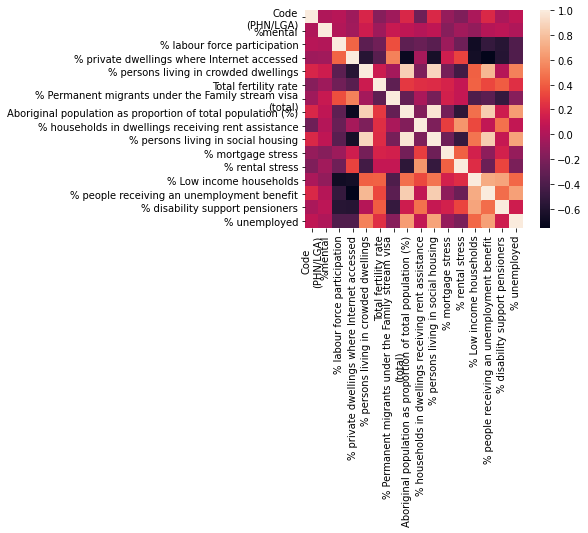

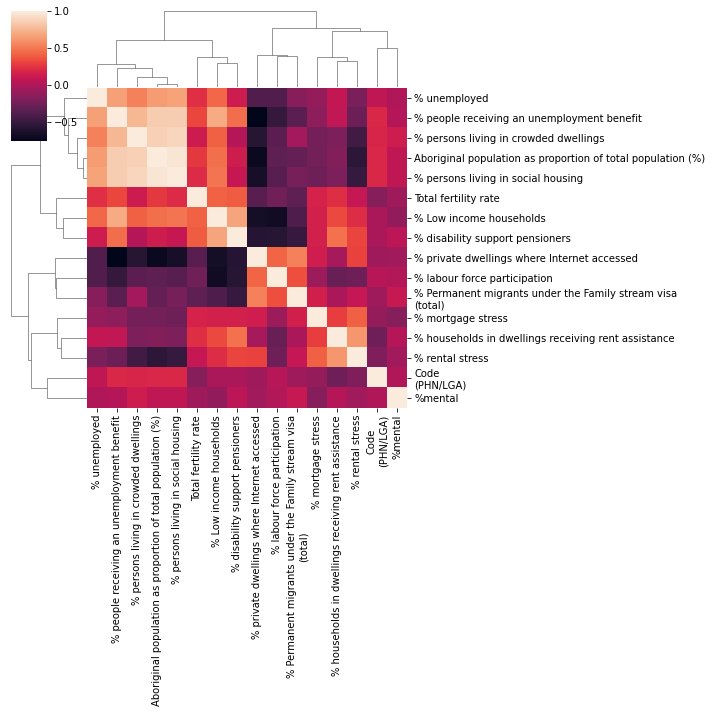

In [32]:
sns.heatmap(feature.corr(), square=True)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.clustermap(feature.corr())
    plt.savefig('heatmap.png')

corr = pd.DataFrame(feature.corr())
corr.to_csv('./corr_non_health.csv')